# >>>>>>>>> `Practice on Classification Models: `<<<<<<<<<<<

# **About Dataset:**

This dataset contains synthetic data designed for predicting age based on various health and lifestyle factors. It includes 3,000 rows with 24 features, each representing different aspects of physical health and lifestyle.

## **Features** / **Meta Data** `:`

**Height (cm):** The height of the individual in centimeters.\
**Weight (kg):** The weight of the individual in kilograms.\
**Blood Pressure (s/d):** Blood pressure (systolic/diastolic) in mmHg.\
**Cholesterol Level (mg/dL):** Cholesterol level in milligrams per deciliter.\
**BMI:** Body Mass Index, calculated from height and weight.\
**Blood Glucose Level (mg/dL):** Blood glucose level in milligrams per deciliter.\
**Bone Density (g/cm²):** Bone density in grams per square centimeter.\
**Vision Sharpness:** Vision sharpness on a scale from 0 (blurry) to 100 (perfect).\
**Hearing Ability (dB):** Hearing ability in decibels.\
**Physical Activity Level:** Categorized as 'Low', 'Moderate', or 'High'.\
**Smoking Status:** Categorical values including 'Never', 'Former', and 'Current'.\
**Alcohol Consumption:** Frequency of alcohol consumption.\
**Diet:** Type of diet, categorized as 'Balanced', 'High Protein', 'Low Carb', etc.\
**Chronic Diseases:** Presence of chronic diseases (e.g., diabetes, hypertension).\
**Medication Use:** Usage of medication.\
**Family History:** Presence of family history of age-related conditions.\
**Cognitive Function:** Self-reported cognitive function on a scale from 0 (poor) to 100 (excellent).\
**Mental Health Status:** Self-reported mental health status on a scale from 0 (poor) to 100 (excellent).\
**Sleep Patterns:** Average number of sleep hours per night.\
**Stress Levels:** Self-reported stress levels on a scale from 0 (low) to 100 (high).\
**Pollution Exposure:** Exposure to pollution measured in arbitrary units.\
**Sun Exposure:** Average sun exposure in hours per week.\
**Education Level:** Highest level of education attained.\
**Income Level:** Annual income in USD.\
**Age (years):** The target variable representing the age of the individual.\
**Generation:**\
The data was synthetically generated to simulate real-world conditions. It may not perfectly reflect real-world data but is designed for educational and research purposes.

**Use Cases:**
Ideal for machine learning models aimed at age prediction based on health and lifestyle factors. Suitable for exploring relationships between health metrics and age.

**Limitations:**
As synthetic data, it may not fully represent the complexities of real-world data. Users should exercise caution when drawing conclusions or applying models trained on this data.

## **DataSet:** 
Click [Here](https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset/data) to Download the Dataset.

# **1_Importing Libraries:**

In [96]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2_Importing the Dataset:**

`Importing the Train dataset.`

In [97]:
df = pd.read_csv('../../../../datasets/age_prediction/age_prediction.csv')

`Overview the Data`

In [98]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,Former,NaN,Low-carb,NaN,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Current,Occasional,Balanced,Hypertension,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Never,NaN,Balanced,Hypertension,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Never,NaN,Balanced,Diabetes,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,Former,Frequent,Vegetarian,NaN,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


# **3_Exploratory Data Analysis:**

## **1_Descriptive Statistics:**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [100]:
df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


## **2_Dealing With Missing Values:**

In [101]:
df.isnull().sum() /len(df) *100

Gender                          0.000000
Height (cm)                     0.000000
Weight (kg)                     0.000000
Blood Pressure (s/d)            0.000000
Cholesterol Level (mg/dL)       0.000000
BMI                             0.000000
Blood Glucose Level (mg/dL)     0.000000
Bone Density (g/cm²)            0.000000
Vision Sharpness                0.000000
Hearing Ability (dB)            0.000000
Physical Activity Level         0.000000
Smoking Status                  0.000000
Alcohol Consumption            40.033333
Diet                            0.000000
Chronic Diseases               43.300000
Medication Use                 39.933333
Family History                 48.366667
Cognitive Function              0.000000
Mental Health Status            0.000000
Sleep Patterns                  0.000000
Stress Levels                   0.000000
Pollution Exposure              0.000000
Sun Exposure                    0.000000
Education Level                20.900000
Income Level    

In [102]:
# as the alcohol cunsumption have 40% missing values
# chronic disease have 43% missing values
# Family History have 48 % missing values
# education level have 20.9% missing values

In [103]:
# i will check the datatypes of these columns
df[['Alcohol Consumption', 'Chronic Diseases', 'Family History', 'Education Level']].dtypes

Alcohol Consumption    object
Chronic Diseases       object
Family History         object
Education Level        object
dtype: object

In [104]:
# checkint the unique values of these columns
df[['Alcohol Consumption', 'Chronic Diseases', 'Family History', 'Education Level']].nunique()

Alcohol Consumption    2
Chronic Diseases       3
Family History         3
Education Level        3
dtype: int64

In [105]:
df_missing = df[['Alcohol Consumption', 'Chronic Diseases', 'Family History', 'Education Level']]

### `Dealing With Alcohol Consumption Column`

In [106]:
df_missing['Alcohol Consumption'].unique()

array([nan, 'Occasional', 'Frequent'], dtype=object)

As there three categories in the Alcohol Consumption Dataset. one is NAN which have to be converted to the `NON AlCOHOLIC` 
and the others are `Occasional` and `Frequent`.

In [107]:
# conveting the nan values to the NON_ALCOHOLIC
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna('non_alcoholic')

In [108]:
df['Alcohol Consumption'].unique()

array(['non_alcoholic', 'Occasional', 'Frequent'], dtype=object)

Checking the missing values in the Alcohol Consumption


In [109]:
# checking the missing values in the Alcohol Consumption
df['Alcohol Consumption'].isnull().sum()

np.int64(0)

### `Dealing With Chronic Diseases Column`

In [110]:
df['Chronic Diseases'].unique()

array([nan, 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

As from the unique values and some common sense, I could say that some people also have no chronic disease, so that we can replace the missing values with the `Healthy`

In [111]:
df['Chronic Diseases'] = df['Chronic Diseases'].fillna('Healthy')

Checking the missing Values and Unique Values now.

In [112]:
df['Chronic Diseases'].unique()

array(['Healthy', 'Hypertension', 'Diabetes', 'Heart Disease'],
      dtype=object)

In [113]:
df['Chronic Diseases'].isnull().sum()

np.int64(0)

### `Dealing With Family History Column`

In [114]:
# checking the unique values in the Family History
df['Family History'].unique()

array([nan, 'Heart Disease', 'Hypertension', 'Diabetes'], dtype=object)

In [115]:
# as the family history and chronic diseases are same, so i will drop the Family History column
df.drop('Family History', axis=1, inplace=True)

### `Dealing With Education Level Column`

In [116]:
# checking the unique values in the Education Level
df['Education Level'].unique()


array([nan, 'Undergraduate', 'High School', 'Postgraduate'], dtype=object)

As there are only 20 percent missing values so we can replace it with mode.

In [117]:
# replacing the nan values with the mode of the column
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])

Checking Unique Values and Missing Values again

In [118]:
df['Education Level'].unique()

array(['Undergraduate', 'High School', 'Postgraduate'], dtype=object)

In [119]:
df['Education Level'].isnull().sum()

np.int64(0)

### `Dealing With Medication Use Column`

In [120]:
df['Medication Use'].unique()

array([nan, 'Regular', 'Occasional'], dtype=object)

As it is clear from the above observation that on category is Regular, and one is occasional, we can replace the missing values by machine learning model or `mode`

In [121]:
df['Medication Use'].fillna(df['Medication Use'].mode()[0], inplace=True)

C:\Users\anony_khan\AppData\Local\Temp\ipykernel_3188\3010152069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication Use'].fillna(df['Medication Use'].mode()[0], inplace=True)


In [122]:
# Checking the Missing Values in the column

df['Medication Use'].isnull().sum()

np.int64(0)

### `Checking the Overall Missing Values Again`

In [123]:
df.isnull().sum() / len(df) * 100

Gender                         0.0
Height (cm)                    0.0
Weight (kg)                    0.0
Blood Pressure (s/d)           0.0
Cholesterol Level (mg/dL)      0.0
BMI                            0.0
Blood Glucose Level (mg/dL)    0.0
Bone Density (g/cm²)           0.0
Vision Sharpness               0.0
Hearing Ability (dB)           0.0
Physical Activity Level        0.0
Smoking Status                 0.0
Alcohol Consumption            0.0
Diet                           0.0
Chronic Diseases               0.0
Medication Use                 0.0
Cognitive Function             0.0
Mental Health Status           0.0
Sleep Patterns                 0.0
Stress Levels                  0.0
Pollution Exposure             0.0
Sun Exposure                   0.0
Education Level                0.0
Income Level                   0.0
Age (years)                    0.0
dtype: float64

## **3_Data Preprocessing:**

### `Checking Outliers in the Dataset`

In [130]:
# seperating the numeric columns from the data to check ouliers
df_num = df[df.columns=='int64']

ValueError: Item wrong length 25 instead of 3000.

C:\Users\anony_khan\AppData\Local\Temp\ipykernel_3188\1797866658.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots()


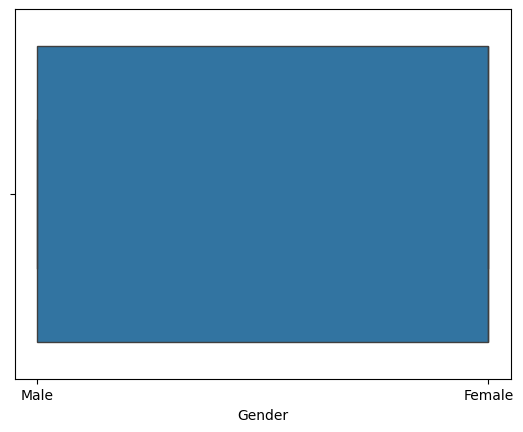

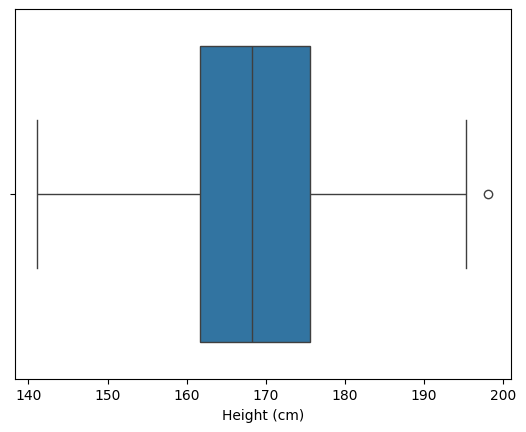

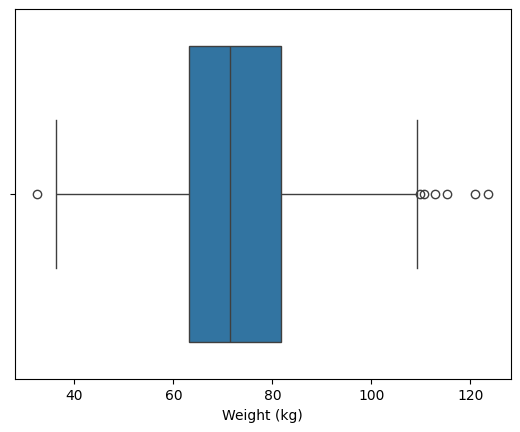

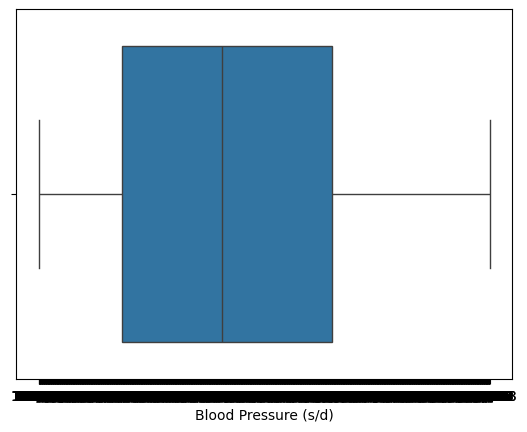

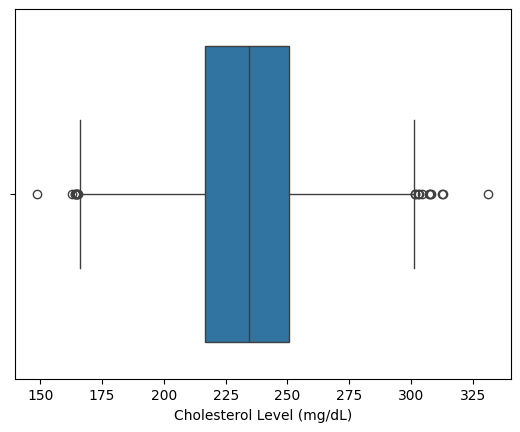

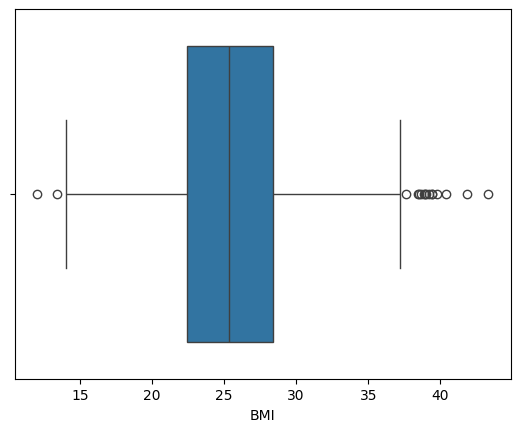

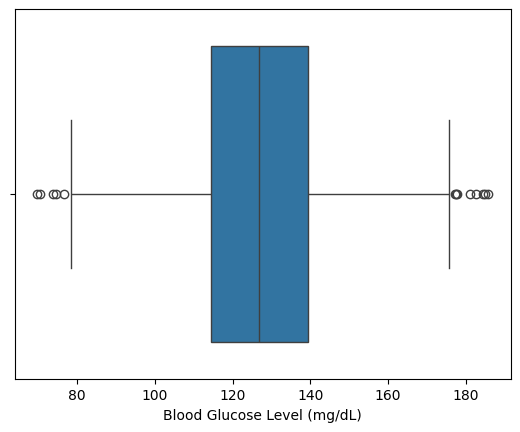

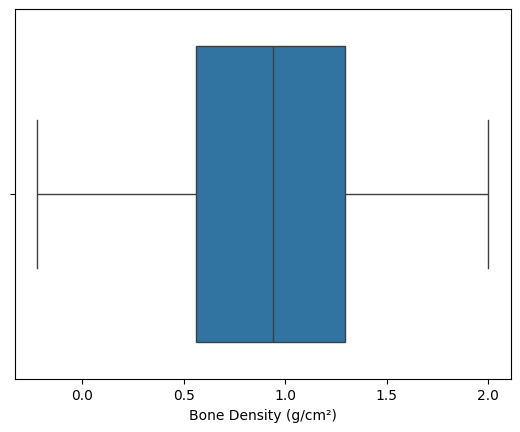

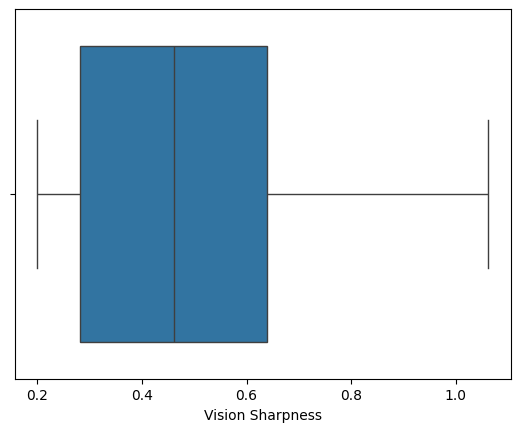

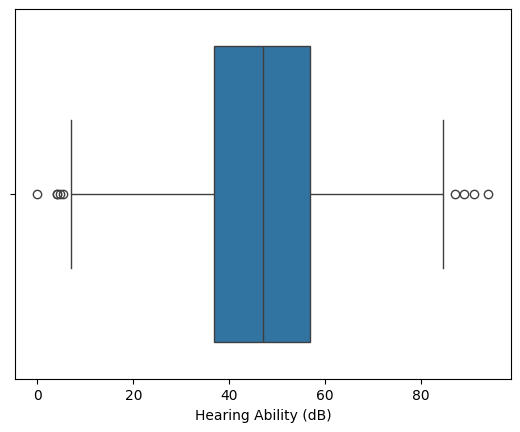

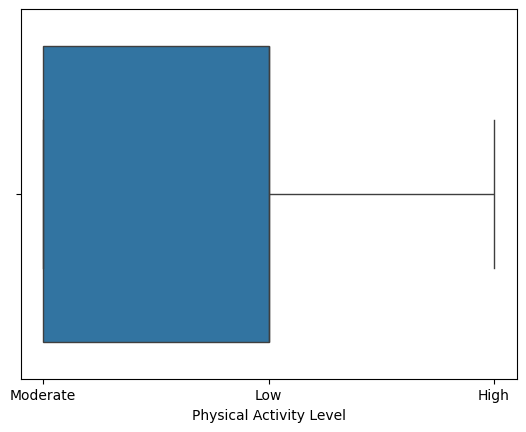

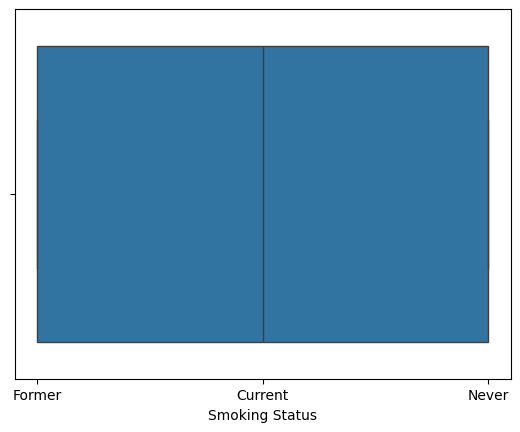

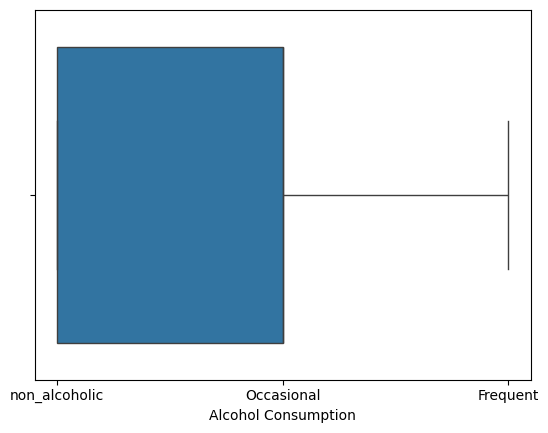

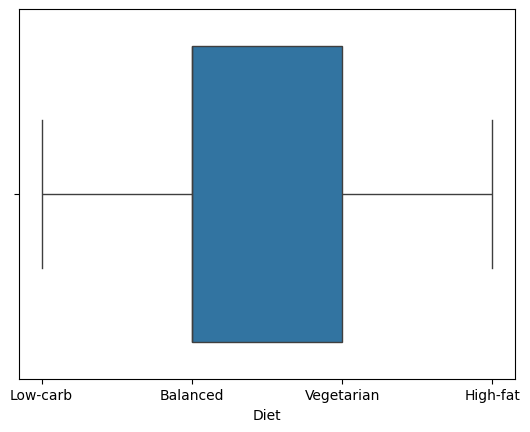

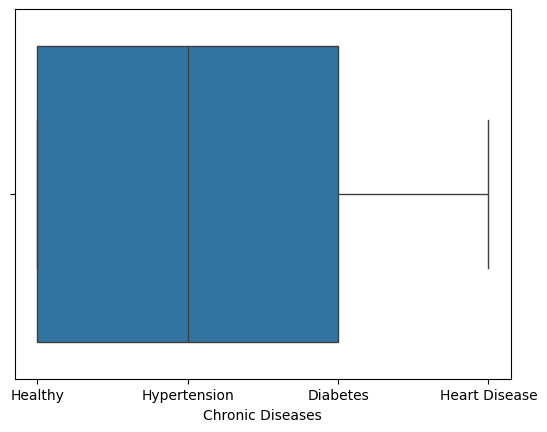

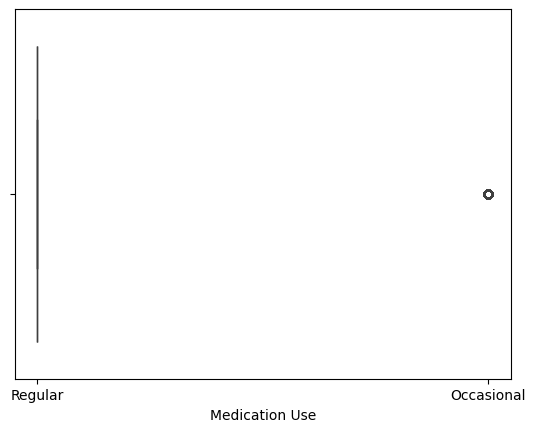

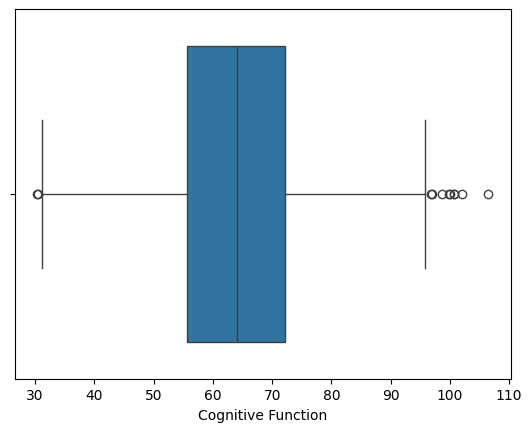

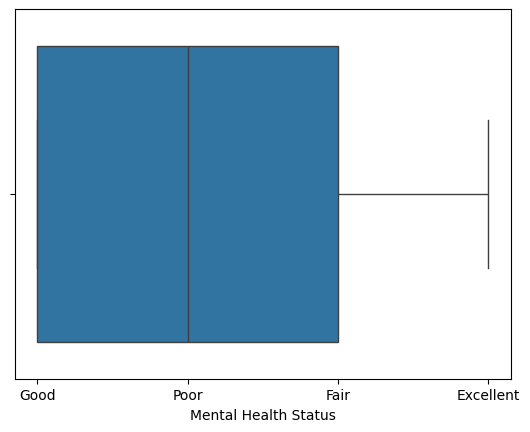

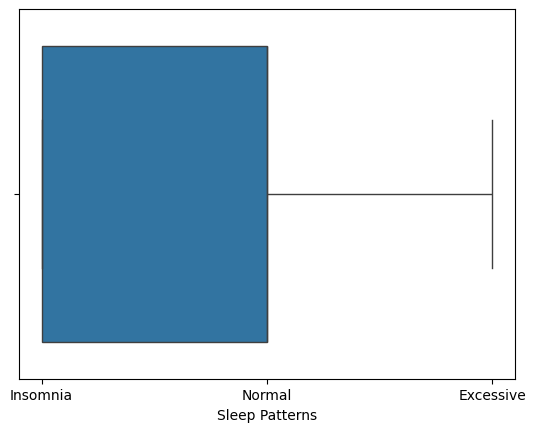

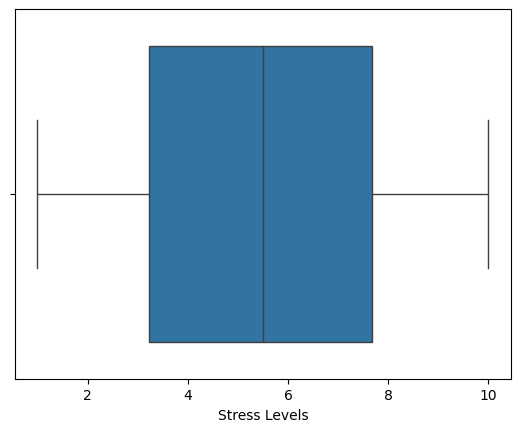

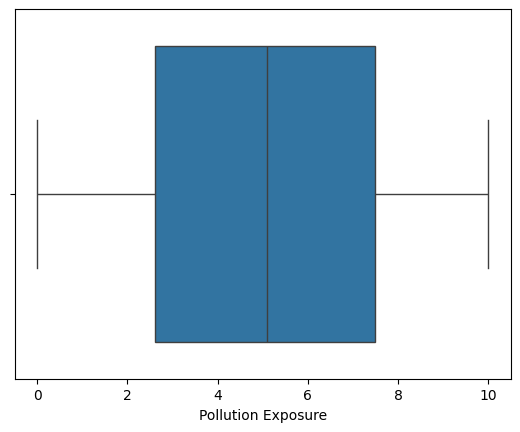

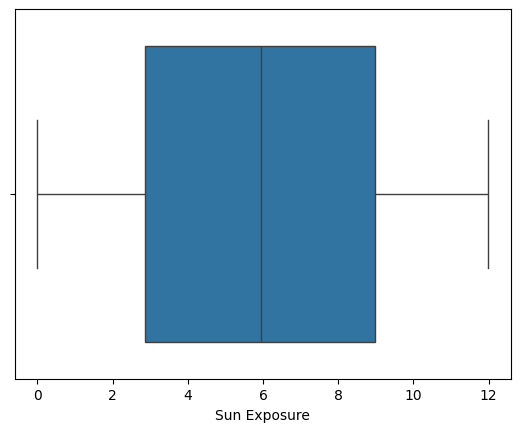

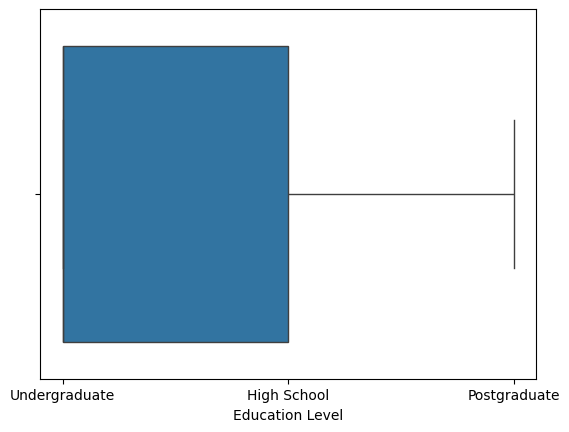

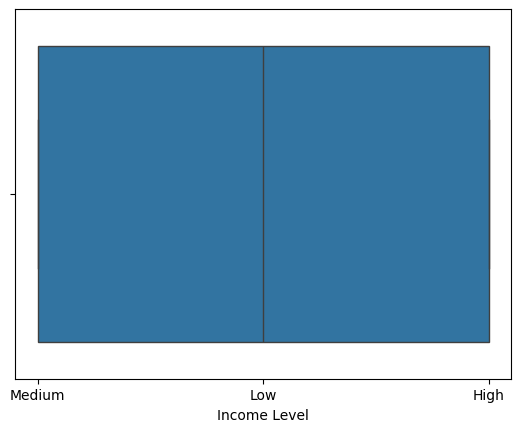

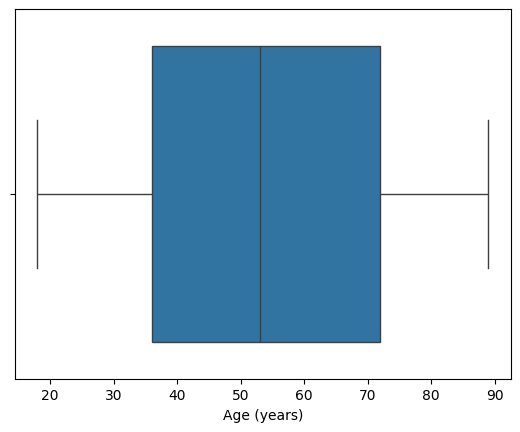

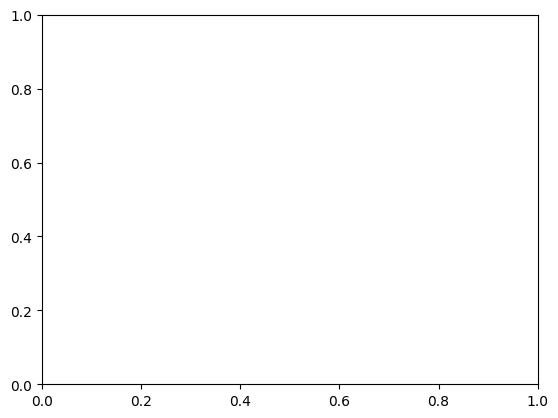

In [127]:
# now checking the ouliers in the whole dataset

for col in df.columns:
    sns.boxplot(data=df ,x= col)
    plt.subplots()